**Practice**

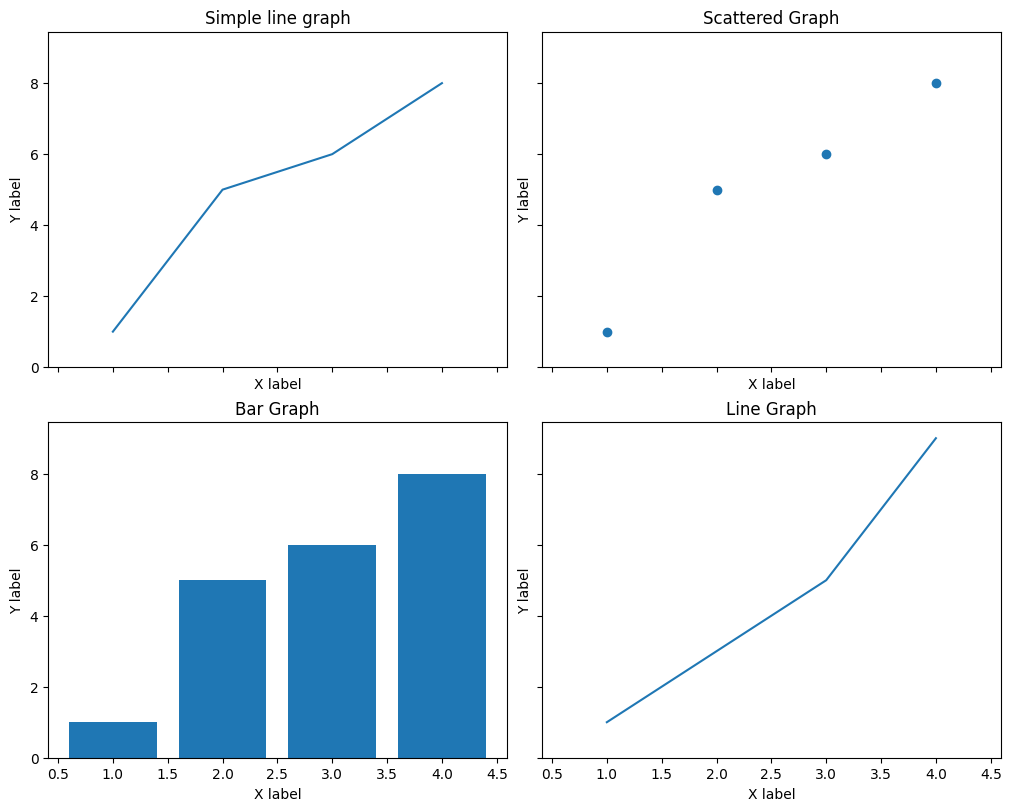

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Simple_Line_Graph(x,y):
    plt.title("Simple Line graph")
    plt.plot(x,y)
    plt.xlabel("X label")
    plt.ylabel("Y label")
    plt.show()

def Scatter_Graph(x,y):
    plt.title("Scattered graph")
    plt.scatter(x,y)
    plt.xlabel("X label")
    plt.ylabel("Y label")
    plt.show()

def Bar_Graph(x,y):
    plt.title("Bar graph")
    plt.bar(x,y)
    plt.xlabel("X label")
    plt.ylabel("Y label")
    plt.show()

def Multiple_Graphs(x,y,z):
    # fig, (ax1,ax2) = plt.subplots(1,2)
    fig, axs = plt.subplots(2,2, figsize=(10,8), constrained_layout=True , sharex=True, sharey=True, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
    axs[0,0].plot(x,y)
    axs[0,0].set_title("Simple line graph")
    axs[0,0].set_xlabel("X label")
    axs[0,0].set_ylabel("Y label")

    axs[0,1].scatter(x,y)
    axs[0,1].set_title("Scattered Graph")
    axs[0,1].set_xlabel("X label")
    axs[0,1].set_ylabel("Y label")

    axs[1,0].bar(x,y)
    axs[1,0].set_title("Bar Graph")
    axs[1,0].set_xlabel("X label")
    axs[1,0].set_ylabel("Y label")

    axs[1,1].plot(x,z)
    axs[1,1].set_title("Line Graph")
    axs[1,1].set_xlabel("X label")
    axs[1,1].set_ylabel("Y label")

    plt.show()

def main():
    x=[1,2,3,4]
    y=[1,5,6,8]
    z=[1,3,5,9]
    # Bar_Graph(x,y)
    # Scatter_Graph(x,y)
    # Simple_Line_Graph(x,y)
    Multiple_Graphs(x,y,z)

main()

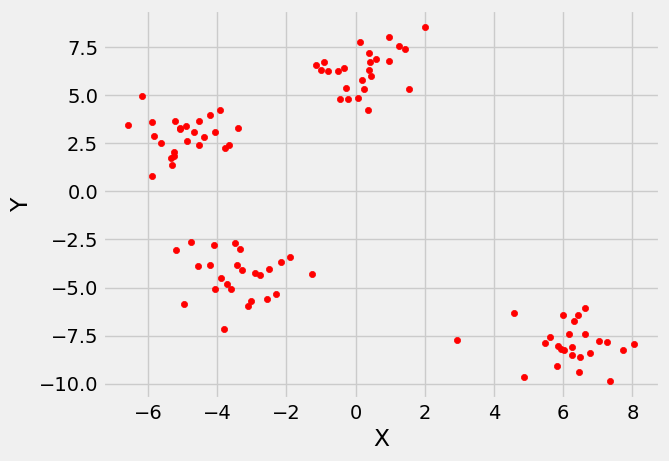

<Figure size 640x480 with 0 Axes>

In [44]:
from sklearn.datasets import make_blobs as blobs
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use("fivethirtyeight")
x,y = blobs(n_samples = 100, centers = 4, cluster_std = 1, n_features = 2)
plt.scatter(x[:, 0], x[:, 1], s = 20, color = 'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.clf()

**Tasks**

Z-Score

In [62]:
import numpy as np
import pandas as pd

np.random.seed(42)

student_ids = [f'Student_{i+1}' for i in range(100)]
marks = np.random.randint(0, 101, size=100)

outlier_ids = [f'Outlier_{i+1}' for i in range(15)]
outlier_marks = [150, -160, -170, 180, 190, 200, 250, -10, -20, -30, 200, 111, 125, 137, 140]

student_ids += outlier_ids
marks = np.concatenate([marks, outlier_marks])

students_data = pd.DataFrame({
    'Student ID': student_ids,
    'Marks': marks
})

print("Original Data:")
print(students_data)

mean = np.mean(marks)
std = np.std(marks)
z_score = (marks - mean) / std
threshold = 1

outliers = np.where(np.abs(z_score) > threshold)[0]

outliers_data = pd.DataFrame({
    'Student ID': np.array(student_ids)[outliers],
    'Marks': marks[outliers]
})

filtered_indices = np.where(np.abs(z_score) < threshold)[0]
filtered_data = pd.DataFrame({
    'Student ID': np.array(student_ids)[filtered_indices],
    'Marks': marks[filtered_indices]
})

print("\nOutliers Data:")
print(outliers_data)

print("\nFiltered Data (without outliers):")
print(filtered_data)


Original Data:
     Student ID  Marks
0     Student_1     51
1     Student_2     92
2     Student_3     14
3     Student_4     71
4     Student_5     60
..          ...    ...
110  Outlier_11    200
111  Outlier_12    111
112  Outlier_13    125
113  Outlier_14    137
114  Outlier_15    140

[115 rows x 2 columns]

Outliers Data:
    Student ID  Marks
0    Outlier_1    150
1    Outlier_2   -160
2    Outlier_3   -170
3    Outlier_4    180
4    Outlier_5    190
5    Outlier_6    200
6    Outlier_7    250
7    Outlier_8    -10
8    Outlier_9    -20
9   Outlier_10    -30
10  Outlier_11    200
11  Outlier_12    111
12  Outlier_13    125
13  Outlier_14    137
14  Outlier_15    140

Filtered Data (without outliers):
     Student ID  Marks
0     Student_1     51
1     Student_2     92
2     Student_3     14
3     Student_4     71
4     Student_5     60
..          ...    ...
95   Student_96     39
96   Student_97     84
97   Student_98     79
98   Student_99     81
99  Student_100     52

[100 

Inter Quartile Range

In [58]:
Q1 = np.percentile(marks, 25)
Q3 = np.percentile(marks, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = np.where((marks < lower_bound) | (marks > upper_bound)[0])

outliers_data = pd.DataFrame({
    'Student ID': np.array(student_ids)[outliers],
    'Marks': marks[outliers]
})

filtered_indices = np.where((marks >= lower_bound) & (marks <= upper_bound))[0]
filtered_data = pd.DataFrame({
    'Student ID': np.array(student_ids)[filtered_indices],
    'Marks': marks[filtered_indices]
})

print("\nOutliers Data:")
print(outliers_data)

print("\nFiltered Data (without outliers):")
print(filtered_data)


Original Data:
     Student ID  Marks
0     Student_1     51
1     Student_2     92
2     Student_3     14
3     Student_4     71
4     Student_5     60
..          ...    ...
110  Outlier_11    300
111  Outlier_12    400
112  Outlier_13    500
113  Outlier_14    600
114  Outlier_15    700

[115 rows x 2 columns]

Outliers Data:
Empty DataFrame
Columns: [Student ID, Marks]
Index: []

Filtered Data (without outliers):
     Student ID  Marks
0     Student_1     51
1     Student_2     92
2     Student_3     14
3     Student_4     71
4     Student_5     60
..          ...    ...
101   Outlier_2    160
102   Outlier_3    170
103   Outlier_8    -10
104   Outlier_9    -20
105  Outlier_10    -30

[106 rows x 2 columns]


Box Plot Method

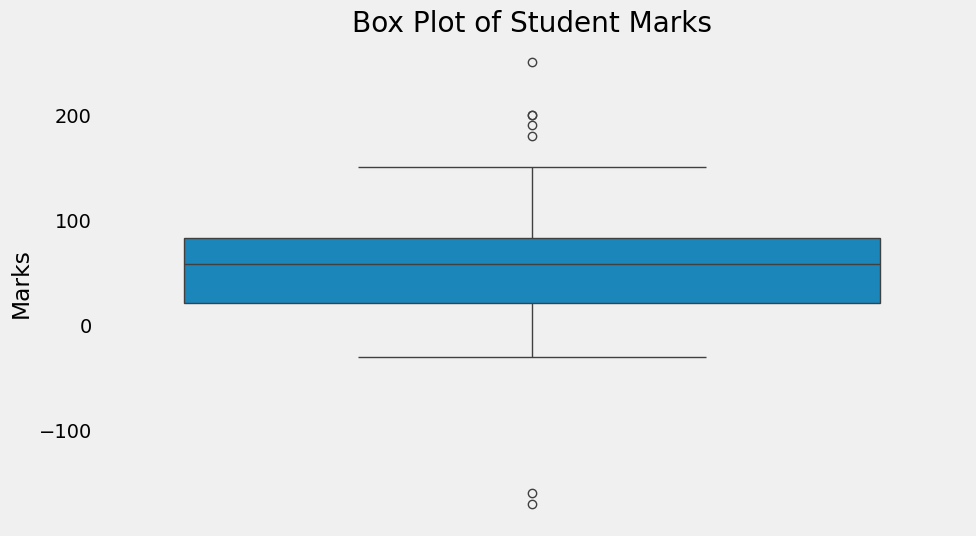

In [65]:
import seaborn as sea
plt.figure(figsize=(10, 6))
sea.boxplot(data=students_data['Marks'])
plt.title('Box Plot of Student Marks')
plt.ylabel('Marks')
plt.grid(axis='y')
plt.show()